In [12]:
from sklearn import datasets
import pandas as pd
import numpy as np
import sklearn.metrics as metrix
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split,cross_validate
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

rescale_=True

In [13]:
dataset = datasets.load_diabetes()

X = dataset.data
y = dataset.target

if rescale_ is True:
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [14]:
xgb_dart = xgb.XGBRegressor(max_depth=3,
                            n_estimators=1000,
                            booster="dart",
                            rate_drop=0.05,
                            random_state=42,
                            n_jobs=3,
                            min_child_weight=4,
                            learning_rate=0.99)

xgb_dart.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.99, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=3, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [15]:
y_pred = xgb_dart.predict(X_test)

mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
print(mse,RMSE)

3188.785096338401 56.46932881076595


In [16]:
xgb_grid = xgb.XGBRegressor(objective= 'reg:linear')
params = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]}

fit_params={"early_stopping_rounds":10, 
            "eval_metric" : "rmse", 
            "eval_set" : [[X_test, y_test]]}


grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=params,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    cv = KFold(n_splits=3,shuffle=True, random_state=42),
    verbose=1)

xgb_grid_model = grid_search.fit(X_train, y_train, **fit_params)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.68679
[0]	validation_0-rmse:122.31050
[1]	validation_0-rmse:100.26638
[1]	validation_0-rmse:99.74365
[2]	validation_0-rmse:85.13361
[2]	validation_0-rmse:84.28214
[3]	validation_0-rmse:74.57945
[4]	validation_0-rmse:69.63231
[3]	validation_0-rmse:74.87596
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederro

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[1]	validation_0-rmse:97.13836
[20]	validation_0-rmse:58.29782
[14]	validation_0-rmse:58.10159
[2]	validation_0-rmse:82.38416
[3]	validation_0-rmse:73.46282
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15]	validation_0-rmse:57.96397
[4]	validation_0-rmse:67.35279
[19]	validation_0-rmse:60.57568
[5]	validation_0-rmse:64.13974
[0]	validation_0-rmse:121.39972
[6]	validation_0-rmse:61.35931
[16]	validation_0-rmse:57.88285
[20]	validation_0-rmse:60.58678
[1]	validation_0-rmse:99.22434
[7]	validation_0-rmse:59.80312
[8]	validation_0-rmse:59.63550
[17]	validation_0-rmse:57.83059
[2]	validation_0-rmse:80.61161
[9]	validation_0-rmse:59.03295
[14]	validation_0-rmse:61.78741
[10]	validation_0-rmse:58.95835
[21]	validation_0-rmse:60.58423
[3]	validation_0-rmse:71.69129
[11]	validation_0-rmse:58.83000
[18]	validation_0-rmse:57

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[15]	validation_0-rmse:53.88498
[31]	validation_0-rmse:60.94244
[19]	validation_0-rmse:61.17129
[12]	validation_0-rmse:58.36294
[16]	validation_0-rmse:53.64577
[45]	validation_0-rmse:55.43367
[24]	validation_0-rmse:57.01072
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17]	validation_0-rmse:53.32746
[20]	validation_0-rmse:61.22993
[0]	validation_0-rmse:123.51850
[1]	validation_0-rmse:97.88915
[18]	validation_0-rmse:53.13649
[2]	validation_0-rmse:83.60235
[3]	validation_0-rmse:73.20212
[13]	validation_0-rmse:57.83293
[4]	validation_0-rmse:67.26229
[17]	validation_0-rmse:61.23775
[18]	validation_0-rmse:61.13131
[19]	validation_0-rmse:53.23860
[19]	validation_0-rmse:61.23052
[20]	validation_0-rmse:61.25825
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_167545778

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[81]	validation_0-rmse:56.80627
[29]	validation_0-rmse:58.92604
[12]	validation_0-rmse:57.73103
[30]	validation_0-rmse:58.90290
[31]	validation_0-rmse:58.88129
[16:06:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17]	validation_0-rmse:59.23383
[82]	validation_0-rmse:56.80632
[14]	validation_0-rmse:60.18503
[83]	validation_0-rmse:56.80650
[84]	validation_0-rmse:56.80615
[15]	validation_0-rmse:60.16033
[85]	validation_0-rmse:56.80703
[16]	validation_0-rmse:60.16151
[86]	validation_0-rmse:56.80681
[87]	validation_0-rmse:56.80635
[32]	validation_0-rmse:58.91175
[88]	validation_0-rmse:56.80635
[17]	validation_0-rmse:60.29999
[89]	validation_0-rmse:56.80647
[90]	validation_0-rmse:56.80690
[33]	validation_0-rmse:58.95183
[18]	validation_0-rmse:60.30219
[34]	validation_0-rmse:58.97828
[9]	validation_0-rmse:57.31935
[35]	validatio

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[13]	validation_0-rmse:61.66347
[15]	validation_0-rmse:59.00547
[14]	validation_0-rmse:61.71368
[15]	validation_0-rmse:61.15509
[16]	validation_0-rmse:58.91211
[16]	validation_0-rmse:61.05235
[11]	validation_0-rmse:60.67798
[17]	validation_0-rmse:60.87018
[17]	validation_0-rmse:58.87846
[12]	validation_0-rmse:60.47996
[18]	validation_0-rmse:61.04983
[13]	validation_0-rmse:60.62973
[19]	validation_0-rmse:61.29264
[18]	validation_0-rmse:58.73595
[19]	validation_0-rmse:58.81681
[14]	validation_0-rmse:60.75783
[20]	validation_0-rmse:58.94262
[19]	validation_0-rmse:52.08682
[21]	validation_0-rmse:59.02152
[15]	validation_0-rmse:60.75664
[16:06:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22]	validation_0-rmse:59.05452
[16]	validation_0-rmse:60.75937
[0]	validation_0-rmse:123.07511
[1]	validation_0-rmse:98.78702
[23]	validatio

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[34]	validation_0-rmse:56.85646
[30]	validation_0-rmse:58.19670
[2]	validation_0-rmse:79.19916
[31]	validation_0-rmse:53.75303
[10]	validation_0-rmse:59.86406
[3]	validation_0-rmse:70.38351
[4]	validation_0-rmse:64.72791
[11]	validation_0-rmse:59.83953
[31]	validation_0-rmse:58.17201
[5]	validation_0-rmse:62.98103
[12]	validation_0-rmse:60.23791
[6]	validation_0-rmse:61.36148
[13]	validation_0-rmse:60.39681
[7]	validation_0-rmse:60.99740
[14]	validation_0-rmse:60.64111
[16:06:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[8]	validation_0-rmse:61.10434
[35]	validation_0-rmse:56.84791
[15]	validation_0-rmse:60.62069
[32]	validation_0-rmse:53.76305
[0]	validation_0-rmse:122.77704
[9]	validation_0-rmse:60.87456
[1]	validation_0-rmse:99.47686
[32]	validation_0-rmse:58.14388
[16]	validation_0-rmse:60.74852
[2]	validation_0-rmse:

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[16:06:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[5]	validation_0-rmse:63.81561
[2]	validation_0-rmse:83.71328
[0]	validation_0-rmse:123.58360
[6]	validation_0-rmse:61.61931
[16]	validation_0-rmse:59.17321
[3]	validation_0-rmse:75.92503
[17]	validation_0-rmse:59.23383
[7]	validation_0-rmse:61.64525
[16:06:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[4]	validation_0-rmse:69.92296
[18]	validation_0-rmse:59.22729
[0]	validation_0-rmse:121.778

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[4]	validation_0-rmse:67.77405
[38]	validation_0-rmse:59.90190
[14]	validation_0-rmse:58.13297
[39]	validation_0-rmse:59.91247
[15]	validation_0-rmse:57.96086
[40]	validation_0-rmse:59.90916
[16]	validation_0-rmse:57.97100
[41]	validation_0-rmse:59.86820
[16]	validation_0-rmse:51.95514
[23]	validation_0-rmse:60.33849
[5]	validation_0-rmse:65.90688
[42]	validation_0-rmse:59.89363
[17]	validation_0-rmse:58.05854
[5]	validation_0-rmse:64.68849
[6]	validation_0-rmse:62.64624
[43]	validation_0-rmse:59.89732
[6]	validation_0-rmse:62.86805
[18]	validation_0-rmse:58.08431
[7]	validation_0-rmse:61.74230
[24]	validation_0-rmse:60.57035
[17]	validation_0-rmse:51.98523
[8]	validation_0-rmse:60.64747
[7]	validation_0-rmse:61.44422
[8]	validation_0-rmse:60.71118
[9]	validation_0-rmse:58.96536
[10]	validation_0-rmse:58.78404
[11]	validation_0-rmse:58.44679
[9]	validation_0-rmse:60.60143
[12]	validation_0-rmse:58.30674
[16:06:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[13]	validation_0-rmse:58.88867
[14]	validation_0-rmse:58.51020
[16:06:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[8]	validation_0-rmse:59.22987
[17]	validation_0-rmse:65.38894
[15]	validation_0-rmse:58.45090
[0]	validation_0-rmse:122.54362
[1]	validation_0-rmse:96.74631
[16]	validation_0-rmse:58.01549
[9]	validation_0-rmse:59.21117
[2]	validation_0-rmse:81.39609
[18]	validation_0-rmse:65.58010
[12]	validation_0-rmse:60.29495
[17]	validation_0-rmse:57.12026
[3]	validation_0-rmse:70.46597
[18]	validation_0-rmse:57.11307
[4]	validation_0-rmse:65.17120
[13]	validation_0-rmse:59.98981
[10]	validation_0-rmse:59.31710
[5]	validation_0-rmse:60.78059
[19]	validation_0-rmse:57.25090
[14]	validation_0-rmse:60.17657
[6]	validation_0-rmse:58.27598
[20]	validation_0-rmse:57.28086
[15]	validation_0-rmse:60.25090
[7]	validation_0-rmse

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[18]	validation_0-rmse:58.84867
[44]	validation_0-rmse:57.51500
[33]	validation_0-rmse:62.03152
[45]	validation_0-rmse:57.52007
[19]	validation_0-rmse:58.92380
[34]	validation_0-rmse:62.03934
[46]	validation_0-rmse:57.51195
[47]	validation_0-rmse:57.51095
[35]	validation_0-rmse:62.00925
[18]	validation_0-rmse:60.71691
[48]	validation_0-rmse:57.51072
[24]	validation_0-rmse:62.25682
[15]	validation_0-rmse:57.86633
[36]	validation_0-rmse:62.01812
[33]	validation_0-rmse:59.28025
[49]	validation_0-rmse:57.50851
[37]	validation_0-rmse:61.99906
[50]	validation_0-rmse:57.50989
[15]	validation_0-rmse:59.99628[25]	validation_0-rmse:62.36315

[51]	validation_0-rmse:57.50873
[38]	validation_0-rmse:62.02167
[16:06:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[52]	validation_0-rmse:57.50475
[19]	validation_0-rmse:60.68318
[39]	validati

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[9]	validation_0-rmse:62.67654
[21]	validation_0-rmse:53.08702
[4]	validation_0-rmse:69.21988
[10]	validation_0-rmse:63.24286
[16]	validation_0-rmse:60.12313
[11]	validation_0-rmse:64.03245
[12]	validation_0-rmse:61.22520
[12]	validation_0-rmse:63.95692
[16:06:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13]	validation_0-rmse:63.61101
[16:06:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17]	validation_0-rmse:60.15803
[0]	validation_0-rmse:122.83978
[22]	validation_0-rmse:53.03200
[0]	validation_0-rmse:122.28156
[14]	validation_0-rmse:63.67217
[1]	validation_0-rmse:100.06022
[16:06:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[10]	validation_0-rmse:58.72250
[21]	validation_0-rmse:60.04721
[11]	validation_0-rmse:59.19638
[16:06:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.64561
[1]	validation_0-rmse:99.97299
[2]	validation_0-rmse:83.09681
[3]	validation_0-rmse:73.72978
[4]	validation_0-rmse:66.75015
[5]	validation_0-rmse:64.14805
[6]	validation_0-rmse:60.70701
[12]	validation_0-rmse:59.58530
[7]	validation_0-rmse:60.42694
[8]	validation_0-rmse:59.73115
[9]	validation_0-rmse:59.47295
[13]	validation_0-rmse:58.66847
[10]	validation_0-rmse:58.92451
[11]	validation_0-rmse:58.30010
[12]	validation_0-rmse:58.11579
[13]	validation_0-rmse:57.83467
[22]	validation_0-rmse:60.13249
[14]	validation_0-rmse:58.95490
[11]	validation_0-rmse:58.30562
[23]	validation_0-rmse:60.13757
[38]	validation_0-rmse:57.28898
[12]	validation_0-rmse

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[11]	validation_0-rmse:60.14748
[6]	validation_0-rmse:58.26913
[8]	validation_0-rmse:60.88547
[9]	validation_0-rmse:59.67915
[17]	validation_0-rmse:55.36769
[22]	validation_0-rmse:59.80972
[12]	validation_0-rmse:60.13033
[10]	validation_0-rmse:58.87000
[11]	validation_0-rmse:57.73776
[13]	validation_0-rmse:60.34973
[18]	validation_0-rmse:55.33082
[12]	validation_0-rmse:57.50546
[11]	validation_0-rmse:62.85571
[7]	validation_0-rmse:56.48775
[23]	validation_0-rmse:59.85868
[13]	validation_0-rmse:57.62597
[19]	validation_0-rmse:55.40106
[14]	validation_0-rmse:60.54460
[14]	validation_0-rmse:57.63732
[8]	validation_0-rmse:56.16733
[15]	validation_0-rmse:57.37786
[9]	validation_0-rmse:55.81498
[20]	validation_0-rmse:55.37679
[15]	validation_0-rmse:59.97368
[16]	validation_0-rmse:57.27767
[17]	validation_0-rmse:57.49789
[12]	validation_0-rmse:63.07027
[16]	validation_0-rmse:60.04556
[21]	validation_0-rmse:55.25096
[18]	validation_0-rmse:57.33225
[17]	validation_0-rmse:60.01449
[10]	validatio

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[17]	validation_0-rmse:58.44247
[21]	validation_0-rmse:61.92877
[4]	validation_0-rmse:65.50959
[2]	validation_0-rmse:82.38416
[27]	validation_0-rmse:57.62482
[22]	validation_0-rmse:61.87489
[5]	validation_0-rmse:62.83202
[3]	validation_0-rmse:73.46282
[28]	validation_0-rmse:57.73695
[26]	validation_0-rmse:58.10063[6]	validation_0-rmse:59.92683

[4]	validation_0-rmse:67.35279
[23]	validation_0-rmse:62.06916
[29]	validation_0-rmse:57.28850
[18]	validation_0-rmse:58.48891
[5]	validation_0-rmse:64.13974
[7]	validation_0-rmse:59.39851
[24]	validation_0-rmse:62.01382
[30]	validation_0-rmse:57.30551
[29]	validation_0-rmse:57.84241[6]	validation_0-rmse:61.35931

[8]	validation_0-rmse:59.00474
[25]	validation_0-rmse:62.03825
[27]	validation_0-rmse:58.10959
[31]	validation_0-rmse:57.30651
[7]	validation_0-rmse:59.80312
[9]	validation_0-rmse:58.74615
[26]	validation_0-rmse:61.99781
[32]	validation_0-rmse:57.30082
[8]	validation_0-rmse:59.63550
[27]	validation_0-rmse:62.02441
[10]	validation_0-rms

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn

[0]	validation_0-rmse:122.59751
[12]	validation_0-rmse:54.03883
[1]	validation_0-rmse:99.54178
[5]	validation_0-rmse:61.18402
[14]	validation_0-rmse:60.50283
[13]	validation_0-rmse:53.46783
[6]	validation_0-rmse:61.04791
[2]	validation_0-rmse:84.25556
[3]	validation_0-rmse:77.62931
[14]	validation_0-rmse:53.41728
[6]	validation_0-rmse:58.50580
[41]	validation_0-rmse:55.08030
[4]	validation_0-rmse:71.10150
[15]	validation_0-rmse:60.31759
[15]	validation_0-rmse:53.16671
[5]	validation_0-rmse:66.07192
[7]	validation_0-rmse:58.29380
[7]	validation_0-rmse:60.65789
[42]	validation_0-rmse:55.07893
[16]	validation_0-rmse:52.46847
[6]	validation_0-rmse:65.00112
[16]	validation_0-rmse:60.12313
[16:06:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[43]	validation_0-rmse:55.08195
[17]	validation_0-rmse:52.73125
[7]	validation_0-rmse:63

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[6]	validation_0-rmse:61.32946
[10]	validation_0-rmse:61.13269
[7]	validation_0-rmse:60.85488
[8]	validation_0-rmse:61.05448
[9]	validation_0-rmse:56.53110
[8]	validation_0-rmse:60.80554
[9]	validation_0-rmse:60.35656
[10]	validation_0-rmse:55.02881
[9]	validation_0-rmse:60.81172
[10]	validation_0-rmse:59.98479
[11]	validation_0-rmse:54.26174
[11]	validation_0-rmse:59.91147
[10]	validation_0-rmse:60.51023
[12]	validation_0-rmse:54.04142
[11]	validation_0-rmse:60.13582
[13]	validation_0-rmse:53.45926
[11]	validation_0-rmse:60.87633[12]	validation_0-rmse:58.92467
[12]	validation_0-rmse:60.08721

[14]	validation_0-rmse:53.58957
[2]	validation_0-rmse:81.81372
[13]	validation_0-rmse:60.07126
[15]	validation_0-rmse:53.51923
[3]	validation_0-rmse:72.82491
[12]	validation_0-rmse:61.27318
[24]	validation_0-rmse:62.25682
[16]	validation_0-rmse:53.03921
[13]	validation_0-rmse:61.20989
[25]	validation_0-rmse:62.36315
[4]	validation_0-rmse:67.02522
[26]	validation_0-rmse:62.52689
[17]	validation_0-

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning


[23]	validation_0-rmse:56.56886
[16:06:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[8]	validation_0-rmse:60.50317
[16:06:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[24]	validation_0-rmse:56.54007
[0]	validation_0-rmse:122.76603
[0]	validation_0-rmse:122.54362
[25]	validation_0-rmse:56.53170
[1]	validation_0-rmse:100.03434
[22]	validation_0-rmse:58.15693
[1]	validation_0-rmse:96.74631
[9]	validation_0-rmse:60.96004
[2]	validation_0-rmse:84.28677
[26]	validation_0-rmse:56.50406
[2]	validation_0-rmse:81.39609
[3]	validation_0-rmse:77.92175
[3]	validation_0-rmse:70.46597
[4]	validation_0-rmse:71.74293
[4]	validation_0-rmse:65.17120
[5]	validation_0-rmse:68.2

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[14]	validation_0-rmse:61.31191
[18]	validation_0-rmse:53.42823
[4]	validation_0-rmse:67.92934
[5]	validation_0-rmse:60.96138
[2]	validation_0-rmse:84.28214
[15]	validation_0-rmse:61.20835
[19]	validation_0-rmse:53.50984
[5]	validation_0-rmse:64.51494
[0]	validation_0-rmse:123.07343
[6]	validation_0-rmse:62.53248
[6]	validation_0-rmse:58.60216
[16]	validation_0-rmse:61.24282
[19]	validation_0-rmse:60.16964
[3]	validation_0-rmse:74.57945
[7]	validation_0-rmse:61.53331
[1]	validation_0-rmse:98.78275
[20]	validation_0-rmse:53.66187
[16:06:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17]	validation_0-rmse:61.14525
[8]	validation_0-rmse:60.46869
[21]	validation_0-rmse:53.60869
[0]	validation_0-rmse:122.28038
[7]	validation_0-rmse:57.75817
[9]	validation_0-rmse:60.54307
[1]	validation_0-rmse:95.69395
[20]	validation_0-rmse:60.

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[5]	validation_0-rmse:64.88471
[10]	validation_0-rmse:61.03017
[6]	validation_0-rmse:62.02020
[7]	validation_0-rmse:61.10426
[20]	validation_0-rmse:61.94830
[8]	validation_0-rmse:61.31182
[21]	validation_0-rmse:61.93579
[36]	validation_0-rmse:55.08330
[9]	validation_0-rmse:60.91456
[11]	validation_0-rmse:60.69573
[10]	validation_0-rmse:61.20397
[22]	validation_0-rmse:61.83398
[11]	validation_0-rmse:60.79002
[23]	validation_0-rmse:61.89143[37]	validation_0-rmse:55.07512

[16:06:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12]	validation_0-rmse:61.12117
[15]	validation_0-rmse:53.88498[12]	validation_0-rmse:61.31044

[24]	validation_0-rmse:61.85759
[38]	validation_0-rmse:55.07449
[25]	validation_0-rmse:61.74445
[13]	validation_0-rmse:61.45002
[0]	validation_0-rmse:121.96326
[39]	validation_0-rmse:55.07366
[13]	validation_0-

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[6]	validation_0-rmse:63.31855
[28]	validation_0-rmse:53.98683
[31]	validation_0-rmse:59.98665
[5]	validation_0-rmse:62.92555
[29]	validation_0-rmse:53.95089
[7]	validation_0-rmse:61.18716
[6]	validation_0-rmse:61.57418
[18]	validation_0-rmse:59.62679
[16:06:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[43]	validation_0-rmse:55.02177
[8]	validation_0-rmse:60.32096
[30]	validation_0-rmse:53.96461
[32]	validation_0-rmse:59.98930
[19]	validation_0-rmse:59.51916
[7]	validation_0-rmse:59.19646
[9]	validation_0-rmse:60.00785
[0]	validation_0-rmse:122.76801
[1]	validation_0-rmse:100.03944
[44]	validation_0-rmse:55.01848
[20]	validation_0-rmse:59.31058
[31]	validation_0-rmse:54.01369
[10]	validation_0-rmse:60.19391
[2]	validation_0-rmse:84.29303
[33]	validation_0-rmse:60.03989
[21]	validation_0-rmse:59.47665
[8]	validation_0-rmse

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[5]	validation_0-rmse:61.11953
[17]	validation_0-rmse:60.76775
[6]	validation_0-rmse:58.43894
[17]	validation_0-rmse:61.09061
[18]	validation_0-rmse:60.80658
[37]	validation_0-rmse:57.04477
[7]	validation_0-rmse:58.23062
[16:06:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[8]	validation_0-rmse:57.89387
[19]	validation_0-rmse:60.82013
[6]	validation_0-rmse:61.12094
[0]	validation_0-rmse:122.24056
[0]	validation_0-rmse:122.31264
[38]	validation_0-rmse:57.04632
[9]	validation_0-rmse:57.26255
[20]	validation_0-rmse:60.78870
[1]	validation_0-rmse:99.74913
[1]	validation_0-rmse:96.61194
[10]	validation_0-rmse:58.

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[14]	validation_0-rmse:59.98242
[11]	validation_0-rmse:59.75082
[33]	validation_0-rmse:58.69047
[15]	validation_0-rmse:59.53680
[12]	validation_0-rmse:59.77001
[16]	validation_0-rmse:62.67637
[13]	validation_0-rmse:60.63158
[30]	validation_0-rmse:56.35274
[34]	validation_0-rmse:58.68535
[16:06:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16]	validation_0-rmse:59.78372
[13]	validation_0-rmse:59.88708
[35]	validation_0-rmse:58.67337
[0]	validation_0-rmse:124.57587
[17]	validation_0-rmse:59.58695
[17]	validation_0-rmse:62.56424
[14]	validation_0-rmse:60.01503
[1]	validation_0-rmse:102.06759
[31]	validation_0-rmse:56.36708
[14]	validation_0-rmse:60.54462
[8]	validation_0-rmse:62.05886
[36]	validation_0-rmse:58.71217[18]	validation_0-rmse:59.60915

[15]	validation_0-rmse:59.83811
[9]	validation_0-rmse:62.33829
[2]	validation_

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[14]	validation_0-rmse:62.52980
[22]	validation_0-rmse:60.09512
[16]	validation_0-rmse:61.97355
[15]	validation_0-rmse:62.20069
[23]	validation_0-rmse:60.13023
[16]	validation_0-rmse:62.29469
[24]	validation_0-rmse:60.12368
[17]	validation_0-rmse:61.89787
[10]	validation_0-rmse:60.18209
[17]	validation_0-rmse:62.23180
[25]	validation_0-rmse:60.12893
[18]	validation_0-rmse:61.89369
[18]	validation_0-rmse:62.19722
[11]	validation_0-rmse:59.96052
[19]	validation_0-rmse:61.87951
[12]	validation_0-rmse:59.90614
[0]	validation_0-rmse:122.93157
[19]	validation_0-rmse:62.29723
[16:06:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[1]	validation_0-rmse:99.62276
[13]	validation_0-rmse:60.09211
[20]	validation_0-rmse:62.24574
[2]	validation_0-rmse:83.61982
[14]	validation_0-rmse:60.20296
[21]	validation_0-rmse:62.29637
[0]	validation_

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[9]	validation_0-rmse:62.33829
[10]	validation_0-rmse:59.52041
[22]	validation_0-rmse:58.52868
[10]	validation_0-rmse:62.74370
[16]	validation_0-rmse:61.50718
[18]	validation_0-rmse:58.22820
[22]	validation_0-rmse:63.87952
[11]	validation_0-rmse:62.82459
[1]	validation_0-rmse:98.18397
[17]	validation_0-rmse:61.45818
[19]	validation_0-rmse:58.30344
[23]	validation_0-rmse:58.65595
[12]	validation_0-rmse:62.68947
[11]	validation_0-rmse:59.38683
[2]	validation_0-rmse:83.98523
[23]	validation_0-rmse:63.79452
[20]	validation_0-rmse:58.26531
[18]	validation_0-rmse:61.41624
[24]	validation_0-rmse:58.66364
[21]	validation_0-rmse:58.30268
[3]	validation_0-rmse:73.82580
[19]	validation_0-rmse:61.42958
[24]	validation_0-rmse:63.81960
[22]	validation_0-rmse:58.30304
[20]	validation_0-rmse:61.42898
[25]	validation_0-rmse:58.63117
[25]	validation_0-rmse:63.90536
[12]	validation_0-rmse:59.35563
[21]	validation_0-rmse:61.39553
[23]	validation_0-rmse:58.29554
[4]	validation_0-rmse:69.58816
[13]	validati

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[16]	validation_0-rmse:59.97708
[5]	validation_0-rmse:64.12809
[6]	validation_0-rmse:62.71548
[18]	validation_0-rmse:58.22820
[17]	validation_0-rmse:59.91250
[7]	validation_0-rmse:62.69093
[18]	validation_0-rmse:59.73695
[19]	validation_0-rmse:58.30344
[8]	validation_0-rmse:61.34701
[13]	validation_0-rmse:60.77552
[16:06:33] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19]	validation_0-rmse:59.77529
[20]	validation_0-rmse:58.26531
[0]	validation_0-rmse:123.07343
[9]	validation_0-rmse:61.08782
[20]	validation_0-rmse:59.81657
[21]	validation_0-rmse:58.30268
[1]	validation_0-rmse:98.93430
[10]	validation_0-rmse:60.47240
[8]	validation_0-rmse:58.20861[12]	validation_0-rmse:61.56001

[2]	validation_0-rmse:85.43655
[21]	validation_0-rmse:59.97733
[22]	validation_0-rmse:58.30304
[11]	validation_0-rmse:60.83286
[3]	validation_0-rmse

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[33]	validation_0-rmse:61.24068
[13]	validation_0-rmse:63.12170
[2]	validation_0-rmse:83.01315
[3]	validation_0-rmse:76.88638
[14]	validation_0-rmse:63.14931
[3]	validation_0-rmse:76.65337
[4]	validation_0-rmse:69.36392
[19]	validation_0-rmse:63.64154
[4]	validation_0-rmse:72.30016
[15]	validation_0-rmse:63.01378
[5]	validation_0-rmse:66.30880
[34]	validation_0-rmse:61.25008
[5]	validation_0-rmse:66.39588
[6]	validation_0-rmse:65.20364
[16]	validation_0-rmse:63.14513
[1]	validation_0-rmse:95.91751
[6]	validation_0-rmse:65.25201
[7]	validation_0-rmse:64.23797
[17]	validation_0-rmse:62.93868
[0]	validation_0-rmse:122.80061
[7]	validation_0-rmse:63.72003
[8]	validation_0-rmse:63.59473
[18]	validation_0-rmse:63.10183
[2]	validation_0-rmse:82.58809
[1]	validation_0-rmse:95.86445
[8]	validation_0-rmse:63.61389
[9]	validation_0-rmse:62.58027
[19]	validation_0-rmse:63.20034
[9]	validation_0-rmse:63.13425
[10]	validation_0-rmse:61.92629
[20]	validation_0-rmse:63.27443
[3]	validation_0-rmse:75.3

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[23]	validation_0-rmse:56.40572
[8]	validation_0-rmse:59.44899
[7]	validation_0-rmse:63.84838
[10]	validation_0-rmse:62.60357
[17]	validation_0-rmse:61.29838
[8]	validation_0-rmse:65.33436
[9]	validation_0-rmse:58.92961
[8]	validation_0-rmse:63.93471
[11]	validation_0-rmse:62.43130
[18]	validation_0-rmse:61.32988
[10]	validation_0-rmse:58.66232
[9]	validation_0-rmse:63.90283
[12]	validation_0-rmse:62.21627
[19]	validation_0-rmse:61.32893
[11]	validation_0-rmse:58.51875
[9]	validation_0-rmse:65.42107
[10]	validation_0-rmse:63.70840
[20]	validation_0-rmse:61.34806
[11]	validation_0-rmse:63.27499
[16:06:33] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21]	validation_0-rmse:61.32515
[12]	validation_0-rmse:63.20333
[10]	validation_0-rmse:65.09958
[0]	validation_0-rmse:122.60539
[13]	validation_0-rmse:62.12341
[13]	validation_0-rm

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[5]	validation_0-rmse:67.03260
[2]	validation_0-rmse:84.90753
[10]	validation_0-rmse:57.71035
[6]	validation_0-rmse:65.10561
[3]	validation_0-rmse:74.94282
[7]	validation_0-rmse:64.17864
[4]	validation_0-rmse:68.80066
[8]	validation_0-rmse:63.09202
[5]	validation_0-rmse:65.92578
[9]	validation_0-rmse:62.51996
[6]	validation_0-rmse:63.65706
[10]	validation_0-rmse:61.86425
[7]	validation_0-rmse:62.89293
[11]	validation_0-rmse:61.82683
[8]	validation_0-rmse:62.30128
[12]	validation_0-rmse:61.59199
[9]	validation_0-rmse:61.34723
[13]	validation_0-rmse:62.00453
[10]	validation_0-rmse:61.70715
[14]	validation_0-rmse:62.04710
[1]	validation_0-rmse:97.51283
[11]	validation_0-rmse:61.33571
[15]	validation_0-rmse:62.32682
[12]	validation_0-rmse:61.42471
[16]	validation_0-rmse:62.06436
[4]	validation_0-rmse:66.98417
[13]	validation_0-rmse:61.80367
[2]	validation_0-rmse:83.05794
[17]	validation_0-rmse:62.14338
[14]	validation_0-rmse:61.76066
[18]	validation_0-rmse:61.93555
[15]	validation_0-rmse:6

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[9]	validation_0-rmse:61.77010
[14]	validation_0-rmse:62.67699
[10]	validation_0-rmse:61.64650
[15]	validation_0-rmse:62.47624
[11]	validation_0-rmse:61.70777
[12]	validation_0-rmse:61.37724
[16]	validation_0-rmse:62.57842
[13]	validation_0-rmse:61.87246
[14]	validation_0-rmse:61.84981
[15]	validation_0-rmse:61.68428
[16]	validation_0-rmse:61.64296
[17]	validation_0-rmse:61.92550
[28]	validation_0-rmse:61.23287
[18]	validation_0-rmse:61.81771
[21]	validation_0-rmse:60.53672
[6]	validation_0-rmse:62.88516
[36]	validation_0-rmse:58.69820
[29]	validation_0-rmse:61.22462
[30]	validation_0-rmse:61.20604
[31]	validation_0-rmse:61.21999
[20]	validation_0-rmse:64.86299
[7]	validation_0-rmse:61.83631
[22]	validation_0-rmse:60.45406
[37]	validation_0-rmse:58.69485
[38]	validation_0-rmse:58.67714
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of re

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[6]	validation_0-rmse:62.70906
[6]	validation_0-rmse:61.19550
[5]	validation_0-rmse:64.75438
[7]	validation_0-rmse:62.68615
[7]	validation_0-rmse:59.32499
[6]	validation_0-rmse:62.22649
[23]	validation_0-rmse:59.01993
[8]	validation_0-rmse:61.33784
[8]	validation_0-rmse:58.63024
[7]	validation_0-rmse:60.45954
[17]	validation_0-rmse:61.76604
[10]	validation_0-rmse:61.43452
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[9]	validation_0-rmse:61.03191
[9]	validation_0-rmse:58.24101
[8]	validation_0-rmse:60.26673
[0]	validation_0-rmse:123.15772
[10]	validation_0-rmse:57.71035
[10]	validation_0-rmse:60.46143
[30]	validation_0-rmse:57.53200[1]	validation_0-rmse:99.37603

[9]	validation_0-rmse:60.28490
[11]	validation_0-rmse:60.82090
[18]	validation_0-rmse:61.42908[11]	validation_0-rmse:57.48133

[2]	validation_0-rmse:84.53

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn

[12]	validation_0-rmse:63.82521
[8]	validation_0-rmse:63.52980
[16]	validation_0-rmse:61.20273
[21]	validation_0-rmse:62.99754
[13]	validation_0-rmse:63.91046
[9]	validation_0-rmse:62.75160
[14]	validation_0-rmse:63.85530
[10]	validation_0-rmse:62.79844
[11]	validation_0-rmse:62.41530
[17]	validation_0-rmse:61.23406
[18]	validation_0-rmse:61.18202
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.97433
[19]	validation_0-rmse:61.13513
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12]	validation_0-rmse:62.66689
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_167545778321

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[7]	validation_0-rmse:61.96353
[0]	validation_0-rmse:122.93157
[6]	validation_0-rmse:62.83254
[6]	validation_0-rmse:61.35469
[8]	validation_0-rmse:61.33784
[1]	validation_0-rmse:99.62276
[17]	validation_0-rmse:64.56671
[7]	validation_0-rmse:62.43097
[7]	validation_0-rmse:59.97161
[18]	validation_0-rmse:60.21255
[2]	validation_0-rmse:83.61982
[21]	validation_0-rmse:56.60206
[9]	validation_0-rmse:61.03191
[8]	validation_0-rmse:61.76136
[3]	validation_0-rmse:74.98848
[8]	validation_0-rmse:61.67740
[8]	validation_0-rmse:59.98438
[18]	validation_0-rmse:64.96483
[10]	validation_0-rmse:60.46143
[4]	validation_0-rmse:68.82656
[9]	validation_0-rmse:58.71023[9]	validation_0-rmse:61.51272

[11]	validation_0-rmse:60.82090
[22]	validation_0-rmse:56.59754
[5]	validation_0-rmse:66.14446
[10]	validation_0-rmse:58.39717
[12]	validation_0-rmse:60.46759
[10]	validation_0-rmse:62.13987
[6]	validation_0-rmse:63.91518
[11]	validation_0-rmse:57.89487
[7]	validation_0-rmse:64.68907
[13]	validation_0-rmse:60.3

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[17]	validation_0-rmse:62.84115
[6]	validation_0-rmse:62.88516
[18]	validation_0-rmse:62.89764
[7]	validation_0-rmse:61.83631
[19]	validation_0-rmse:63.28773
[8]	validation_0-rmse:60.88142
[20]	validation_0-rmse:63.22583
[9]	validation_0-rmse:61.06905[21]	validation_0-rmse:63.21434
[25]	validation_0-rmse:60.27141
[40]	validation_0-rmse:61.16089
[26]	validation_0-rmse:60.24735
[41]	validation_0-rmse:61.16414
[27]	validation_0-rmse:60.25322
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.80061

[1]	validation_0-rmse:95.86445
[28]	validation_0-rmse:60.23487
[16:06:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19]	validation_0-rmse:

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

se:58.95217
[63]	validation_0-rmse:59.72774
[2]	validation_0-rmse:85.43655
[17]	validation_0-rmse:61.84096
[16]	validation_0-rmse:56.48676
[64]	validation_0-rmse:59.72805
[7]	validation_0-rmse:58.64539
[30]	validation_0-rmse:55.49573
[65]	validation_0-rmse:59.72753
[9]	validation_0-rmse:60.54959
[21]	validation_0-rmse:59.42334
[8]	validation_0-rmse:60.02472
[3]	validation_0-rmse:76.70046
[18]	validation_0-rmse:61.72485
[22]	validation_0-rmse:59.51196
[9]	validation_0-rmse:59.82714
[4]	validation_0-rmse:72.05697
[31]	validation_0-rmse:55.52938
[10]	validation_0-rmse:59.27725
[19]	validation_0-rmse:61.67725
[23]	validation_0-rmse:59.52952
[10]	validation_0-rmse:59.88601
[5]	validation_0-rmse:66.94260
[17]	validation_0-rmse:56.76680
[20]	validation_0-rmse:61.60967
[11]	validation_0-rmse:59.71810
[6]	validation_0-rmse:64.78102
[24]	validation_0-rmse:59.53157
[32]	validation_0-rmse:55.53590
[66]	validation_0-rmse:59.72625
[11]	validation_0-rmse:59.34060
[7]	validation_0-rmse:63.01971
[12]	v

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[20]	validation_0-rmse:61.30054
[7]	validation_0-rmse:63.78293
[3]	validation_0-rmse:76.88638
[4]	validation_0-rmse:68.72885
[4]	validation_0-rmse:69.36392
[5]	validation_0-rmse:66.62841
[8]	validation_0-rmse:63.52980
[16:06:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[5]	validation_0-rmse:66.30880
[21]	validation_0-rmse:61.46062
[6]	validation_0-rmse:63.81914
[9]	validation_0-rmse:62.75160
[0]	validation_0-rmse:121.54530
[6]	validation_0-rmse:65.20364
[7]	validation_0-rmse:63.02223
[10]	validation_0-rmse:62.79844
[1]	validation_0-rmse:97.12457
[7]	validation_0-rmse:64.23797
[2]	validation_0-rmse:83.70579
[11]	validation_0-rmse:62.41530
[8]	validation_0-rmse:62.65023
[8]	validation_0-rmse:63.59473
[20]	validation_0-rmse:61.66822
[3]	validation_0-rmse:74.62322
[22]	validation_0-rmse:61.45838
[12]	validation_0-rmse:62.6668

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[7]	validation_0-rmse:65.54057
[20]	validation_0-rmse:61.89016
[10]	validation_0-rmse:64.14837
[1]	validation_0-rmse:96.77617
[8]	validation_0-rmse:65.33436
[2]	validation_0-rmse:82.51773
[11]	validation_0-rmse:63.71356
[9]	validation_0-rmse:65.42107[3]	validation_0-rmse:73.85588

[12]	validation_0-rmse:63.82521
[0]	validation_0-rmse:122.55396
[4]	validation_0-rmse:67.83186
[10]	validation_0-rmse:65.09958
[13]	validation_0-rmse:63.91046
[5]	validation_0-rmse:64.21214
[16:06:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[1]	validation_0-rmse:95.74999
[11]	validation_0-rmse:65.90094
[14]	validation_0-rmse:63.85530
[21]	validation_0-rmse:61.87558
[6]	validation_0-rmse:60.96567
[0]	validation_0-rmse:123.77422
[12]	validation_0-rmse:66.07178
[1]	validation_0-rmse:101.83313
[15]	validation_0-rmse:63.85410
[7]	validation_0-rmse:5

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[9]	validation_0-rmse:62.75160
[16:06:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[8]	validation_0-rmse:63.92744
[6]	validation_0-rmse:65.25201
[0]	validation_0-rmse:122.71857
[35]	validation_0-rmse:55.80849
[24]	validation_0-rmse:58.57392
[10]	validation_0-rmse:62.79844
[9]	validation_0-rmse:63.88984
[1]	validation_0-rmse:96.82248
[7]	validation_0-rmse:63.72003
[2]	validation_0-rmse:82.48356
[11]	validation_0-rmse:62.41530
[8]	validation_0-rmse:63.61389
[36]	validation_0-rmse:55.82401
[16:06:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[3]	validation_0-rmse:71.92363
[10]	validation_0-rmse:63.69668
[12]	validation_0-rmse:62.66689
[9]	validation_0-rmse:63.13

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[14]	validation_0-rmse:63.77380
[2]	validation_0-rmse:84.59568
[6]	validation_0-rmse:64.57121
[3]	validation_0-rmse:76.71655
[7]	validation_0-rmse:63.45120
[19]	validation_0-rmse:61.83285[3]	validation_0-rmse:73.73136
[4]	validation_0-rmse:68.76114
[14]	validation_0-rmse:64.08962
[19]	validation_0-rmse:60.68481
[8]	validation_0-rmse:62.19258

[15]	validation_0-rmse:63.53423
[5]	validation_0-rmse:65.88595
[9]	validation_0-rmse:61.92415
[6]	validation_0-rmse:63.58115
[4]	validation_0-rmse:67.18935[20]	validation_0-rmse:60.58943

[10]	validation_0-rmse:61.21432
[7]	validation_0-rmse:61.99232
[20]	validation_0-rmse:61.89222
[15]	validation_0-rmse:64.18275
[16]	validation_0-rmse:63.45861
[11]	validation_0-rmse:60.96875
[8]	validation_0-rmse:61.02326
[21]	validation_0-rmse:60.71247
[12]	validation_0-rmse:61.08832
[9]	validation_0-rmse:61.69864
[17]	validation_0-rmse:63.61911
[5]	validation_0-rmse:65.03631
[10]	validation_0-rmse:61.04492
[16]	validation_0-rmse:64.61679
[22]	validation_0-rmse:

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

In [17]:
print('Best Parameter:')
print(xgb_grid_model.best_params_)
print('Best Estimator:') 
print(xgb_grid_model.best_estimator_)

Best Parameter:
{'colsample_bytree': 0.7, 'max_depth': 20, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.9}
Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)


In [18]:
y_pred_train = xgb_grid_model.best_estimator_.predict(X_train)
y_pred = xgb_grid_model.best_estimator_.predict(X_test)

In [19]:
print ('On train set:')
mse=metrix.mean_squared_error(y_train, y_pred_train)
RMSE = metrix.mean_squared_error(y_train, y_pred_train, squared=False)
r2_ = metrix.r2_score(y_train, y_pred_train)
print(mse,RMSE,r2_)

print ('On test set:')
mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
r2_ = metrix.r2_score(y_test, y_pred)
print(mse,RMSE,r2_)



On train set:
30.227333157400636 5.49793899178598 0.9950254520699915
On test set:
3748.452203176389 61.224604557125474 0.292498142540765


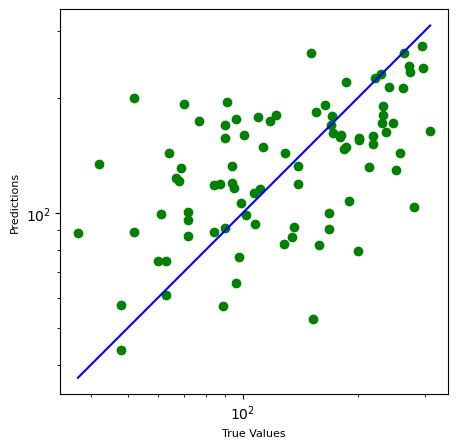

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


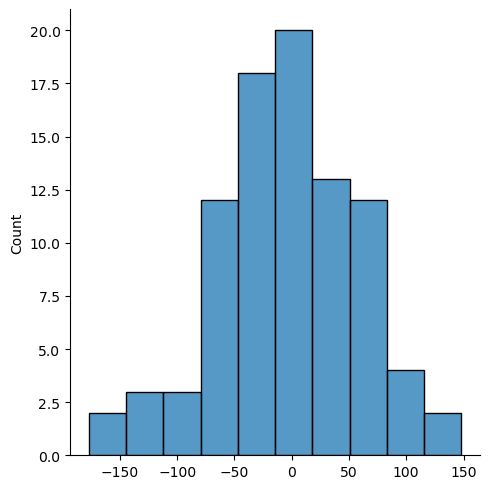

In [21]:
sns.displot(y_pred-y_test)

In [22]:
from sklearn.linear_model import Ridge,Lasso

model = Ridge(alpha=0.05) 
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print ('On test set:')
mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
r2_ = metrix.r2_score(y_test, y_pred)
print(mse,RMSE,r2_)

On test set:
2899.613434103344 53.84805877748374 0.4527122718002198


In [23]:
parameters = {'alpha':[0.001,0.01,0.05,0.1,0.5,1,10]}

model = Ridge()

r_grid= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=3)

r_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [24]:
print('Best Parameter:')
print(r_grid.best_params_)
print('Best Estimator:') 
print(r_grid.best_estimator_)

Best Parameter:
{'alpha': 0.5}
Best Estimator:
Ridge(alpha=0.5)


In [25]:
r_best = r_grid.best_estimator_
model = r_best.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print ('On test set:')
mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
r2_ = metrix.r2_score(y_test, y_pred)
print(mse,RMSE,r2_)

On test set:
2895.3537564391304 53.8084914900904 0.45351626494092334


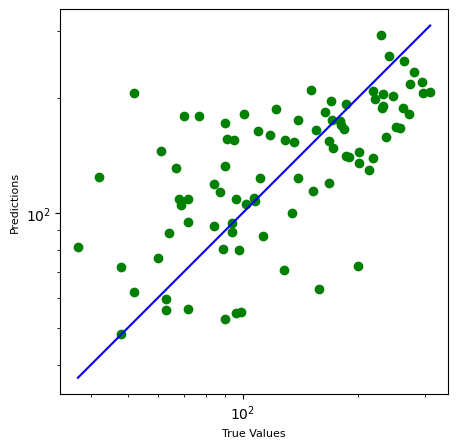

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


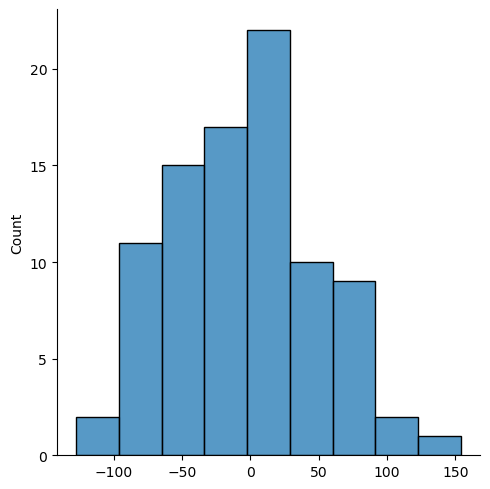

In [27]:
sns.displot(y_pred-y_test)